In [1]:
import IPython
from scipy.io import wavfile
import scipy.signal
import numpy as np
import matplotlib.pyplot as plt
import librosa

wav_loc = "test.wav"
rate, data = wavfile.read(wav_loc)
print(type(data))

print(data.ndim) # Data is 1-D array for 1-channel WAV
print(data.size)

# print(data[127878])

# Standard 44.1 KHz sample rate for 16-bit wav file
print(rate)

# Assuming that the wav-file is 16 bit integer, the range is [-32768, 32767],
# thus dividing by 32768 (2^15) will give the proper twos-complement range of [-1, 1]

data = data / 32768 
print(len(data)) # 200542

<class 'numpy.ndarray'>
1
200542
44100
200542


In [20]:
# from https://stackoverflow.com/questions/33933842/how-to-generate-noise-in-frequency-range-with-numpy
def fftnoise(f):
    # array of complx numbers with size 200542
    f = np.array(f, dtype="complex")
    Np = (len(f) - 1) // 2
    phases = np.random.rand(Np) * 2 * np.pi
    phases = np.cos(phases) + 1j * np.sin(phases)
    f[1 : Np + 1] *= phases
    f[-1 : -1 - Np : -1] = np.conj(f[1 : Np + 1])
    return np.fft.ifft(f).real

#                      4000,  12000       len(data)=200542, 44.1kHz
def band_limited_noise(min_freq, max_freq, samples=1024, samplerate=1):
#               Sample spacing (inverse of the sampling rate). 1 / samplerate          
#                                window length n = 200542,  sample spacing is in seconds
    freqs = np.abs(np.fft.fftfreq(samples, 1 / samplerate)) # frequency unit is in cycles/second
#   Array of length n containing the absolute values of sample frequencies.
    f = np.zeros(samples) # 1D array of 200542 zeros
    
    f[np.logical_and(freqs >= min_freq, freqs <= max_freq)] = 1
    return fftnoise(f)

length of mf is 200542
compf is [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
length of compf is 200542
Np is 100270
[5.08340155 2.79074218 0.62148119 ... 3.56673399 4.81899488 2.5255177 ]
Phases as complex numbers [ 0.36255929-0.93196071j -0.93908075+0.3436966j   0.81301694+0.58224003j
 ... -0.91098045-0.41244954j  0.10640409-0.99432297j
 -0.81615277+0.57783618j]
compf[1 : Np + 1] *= phases becomes [ 0.+0.j -0.+0.j  0.+0.j ...  0.-0.j  0.+0.j -0.+0.j]
compf[-1 : -1 - Np : -1] = np.conj(compf[1 : Np + 1])
            becomes [ 0.-0.j -0.-0.j  0.-0.j ...  0.+0.j  0.-0.j -0.-0.j]
noise_from_rec_wave is [ 5.22520283e-04  2.62553111e-03  1.49961263e-03 ... -2.86119949e-05
 -2.14235742e-03 -2.05735342e-03]


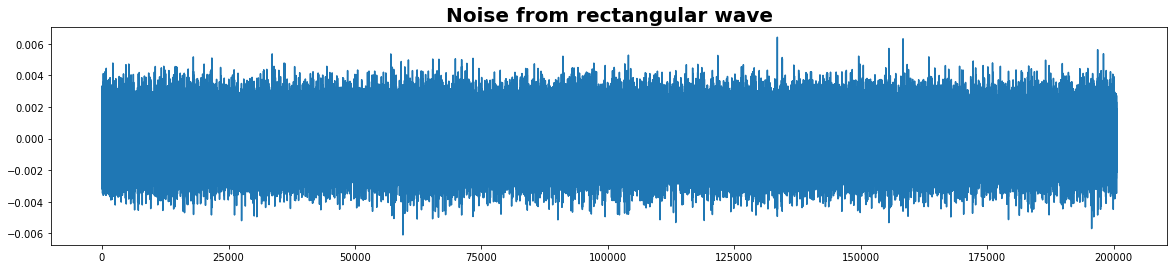

In [18]:
import sys
# np.set_printoptions(threshold=None)
#                                        len(data)
sample_frequencies = np.abs(np.fft.fftfreq(200542, 1 / 44100))
# print(sample_frequencies)

sampls = 200542 # len(data) or data.size
mf = np.zeros(sampls) # 1D array of 200542 zeros

# np.set_printoptions(threshold=None)
# print(sample_frequencies[51435:])

# print((sample_frequencies>=4000)[112345])

moyfig, moyax = plt.subplots(figsize=(20,4))

# moyax.plot(data)
# plt.title('Originial test.wav plot', fontsize=20, fontweight='bold')
# plt.savefig('imgs/original_test_file')

# moyax.plot(sample_frequencies)
# moyax.cla()

#mf
#[0, 0.23, ..,  4102, ... , 12434.78, ..., 20000] = sample_frequencies
#[0000000000000000000000000000000000000000000000000000000] = mf

# [0000000000000, 4000.0, ...., 12000, 00000000000000]
# -----------------------------------------------
# boolean indexing in np array
# Compute the truth value of sample_frequencies greater than 4K AND sample_frequencies greater than 12K.
# # mf[np.logical_and(sample_frequencies >= 4000, sample_frequencies <= 12000)] = 1
mf = np.logical_and(sample_frequencies >= 4000, sample_frequencies <= 12000) # creates rectangular wave
print(f'length of mf is {len(mf)}') # 200542

# moyax.cla()
# moyax.plot(mf, color='r', lw=4)
# plt.title('Rectangular wave before transformation', fontsize=20, fontweight='bold')
# plt.savefig('imgs/rectangular_wave')
# print(mf)

# # -----------------------------------------------------
# mf rectangular wave real
compf = np.array(mf, dtype="complex")
#compf rectangular wave but complex
print(f'compf is {compf}')

# moyax.plot(compf.real, color='r', linewidth=3)

print(f'length of compf is {len(compf)}') # 200542

Np = (len(compf) - 1) // 2
print(f'Np is {Np}')

#        [0, 1)
phases = np.random.rand(Np) * 2 * np.pi # get w>0 for cos
print(phases)

# moyax.cla()
# moyax.plot(phases)

# e^(iwt) = cos(wt) + i*sin(wt), when w<0 : cos(wt) - i * sin(wt)
phases = np.cos(phases) + 1j * np.sin(phases) 
print(f'Phases as complex numbers {phases}')
# moyax.plot(phases)

# moyax.cla()
# moyax.plot(phases.real)

compf[1 : Np + 1] *= phases
print(f'compf[1 : Np + 1] *= phases becomes {compf[1 : Np + 1]}')

compf[-1 : -1 - Np : -1] = np.conj(compf[1 : Np + 1])
print(f'compf[-1 : -1 - Np : -1] = np.conj(compf[1 : Np + 1])\n\
            becomes {compf[-1 : -1 - Np : -1]}')

# moyax.cla()
# moyax.plot(compf) # ComplexWarning: Casting complex values to real discards the imaginary part
                                                  # return np.asarray(x, float)
# Better be
# moyax.cla()
# moyax.plot(compf.real)

#--------------------------------------------------------------
noise_from_rec_wave = np.fft.ifft(compf).real # take reals
print(f'noise_from_rec_wave is {noise_from_rec_wave}')

# moyax.cla()
# moyax.plot(noise_from_rec_wave)
# plt.title('Noise from rectangular wave', fontsize=20, fontweight='bold')
# plt.savefig('imgs/noise')

# moyax.plot(data)
# Mistake not rec wave but compf wave after ifft
# IPython.display.Audio(data=noise_from_rec_wave, rate=rate)

# # ---------------------------------------------------
# # np.set_printoptions(threshold=None) # for array representation
# # IPython.display.Audio(data=mf, rate=44100) # not displayed
# print('-'*34)
# mynoise = fftnoise(mf) * 10 # for 0.006 to be 0.6

# moyax.cla()
# moyax.plot(mynoise)
# print(mynoise)
# IPython.display.Audio(data=mynoise, rate=rate)

In [21]:
import IPython
%matplotlib inline
IPython.display.Audio(data=data, rate=rate)

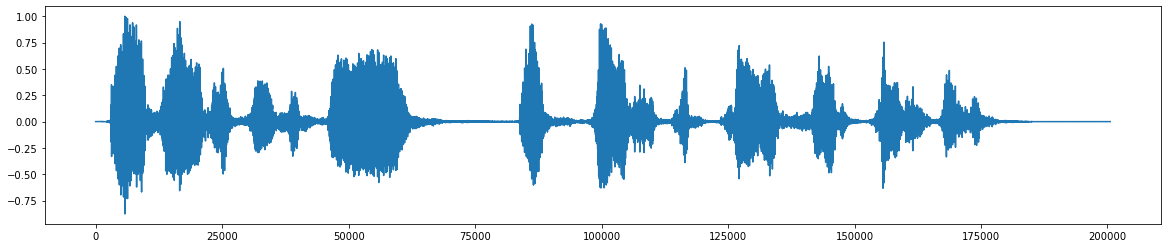

In [21]:
fig, ax = plt.subplots(figsize=(20,4))
ax.plot(data)

[-0.00810292 -0.0066597   0.01070757 ... -0.01045237 -0.01464001
 -0.00738546]
200542
88200


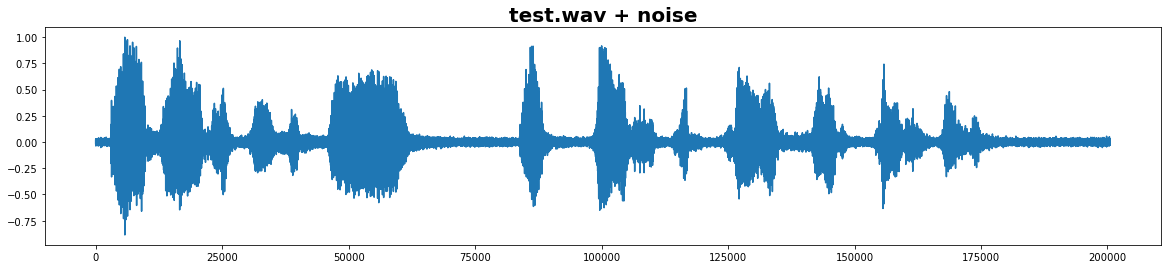

In [25]:
# Adding noise
noise_len = 2 # seconds
noise = band_limited_noise(min_freq=4000, max_freq = 12000, samples=len(data), samplerate=rate)*10

print(noise)
print(noise.size)
noise_fig, noise_ax = plt.subplots(figsize=(20,4))

# noise_ax.plot(noise)
# noise_ax.plot(noise_from_rec_wave)
# plt.title('test.wav + noise', fontsize=20, fontweight='bold')
# plt.savefig('imgs/signal_with_noise')
                                   
noise_clip = noise[:rate*noise_len] # get two seconds of the clip by double sampling with sampling rate=44.1kHz
print(noise_clip.size)
audio_clip_band_limited = data+noise
plt.cla()
noise_ax.plot(audio_clip_band_limited)
plt.title('test.wav + noise', fontsize=20, fontweight='bold')
plt.savefig('imgs/signal_with_noise')
# IPython.display.Audio(data=noise_clip, rate=rate)

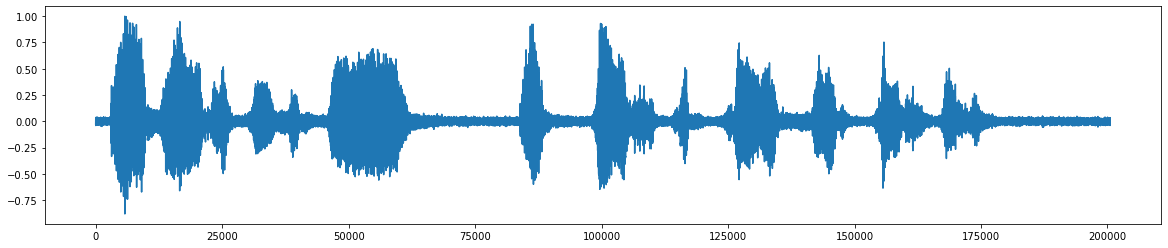

In [26]:
fig, ax = plt.subplots(figsize=(20,4))
ax.plot(audio_clip_band_limited)
IPython.display.Audio(data=audio_clip_band_limited, rate=rate)